# Notebook 1: FitzHugh-Nagumo Neuron Basics

## Overview
This notebook introduces the **FitzHugh-Nagumo (FHN) model**, a simplified two-dimensional model of neuronal excitability derived from the Hodgkin-Huxley equations.

### Mathematical Model
The FHN model consists of two coupled differential equations:

$$\frac{dv}{dt} = v - \frac{v^3}{3} - w + I_{ext}$$

$$\tau \frac{dw}{dt} = v + a - bw$$

Where:
- $v$ = membrane potential (fast variable)
- $w$ = recovery variable (slow variable)
- $I_{ext}$ = external input current
- $a, b, \tau$ = model parameters

### Learning Objectives
1. Implement the FHN model numerically
2. Visualize neuron dynamics in time and phase space
3. Understand excitability vs oscillatory behavior
4. Analyze phase plane structure (nullclines and trajectories)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys

# Import custom modules
from config import FHN_PARAMS, SIM_PARAMS, VIZ_PARAMS
from utils import fitzhugh_nagumo_ode, fhn_nullclines, plot_neuron_timeseries, plot_phase_plane

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Libraries imported successfully!")
print(f"Default FHN parameters: {FHN_PARAMS}")

Libraries imported successfully!
Default FHN parameters: {'a': 0.7, 'b': 0.8, 'tau': 12.5, 'I_ext': 0.5}


## Section 1: Simulating a Single FHN Neuron

Let's simulate the FHN model with default parameters and observe its behavior.

In [2]:
# Simulation parameters
t_max = 100  # Total simulation time
dt = 0.01    # Time step
t = np.arange(0, t_max, dt)

# Initial conditions: [v0, w0]
initial_state = [0.1, 0.1]

# Unpack FHN parameters
a = FHN_PARAMS['a']
b = FHN_PARAMS['b']
tau = FHN_PARAMS['tau']
I_ext = FHN_PARAMS['I_ext']  # External current

# Solve the ODE
solution = odeint(fitzhugh_nagumo_ode, initial_state, t, args=(a, b, tau, I_ext))
v = solution[:, 0]  # Membrane potential
w = solution[:, 1]  # Recovery variable

print(f"Simulation complete: {len(t)} time points")
print(f"v range: [{v.min():.3f}, {v.max():.3f}]")
print(f"w range: [{w.min():.3f}, {w.max():.3f}]")

Simulation complete: 10000 time points
v range: [-1.970, 1.852]
w range: [-0.246, 1.394]


## Section 2: Time Series Visualization

Plot the membrane potential and recovery variable over time.

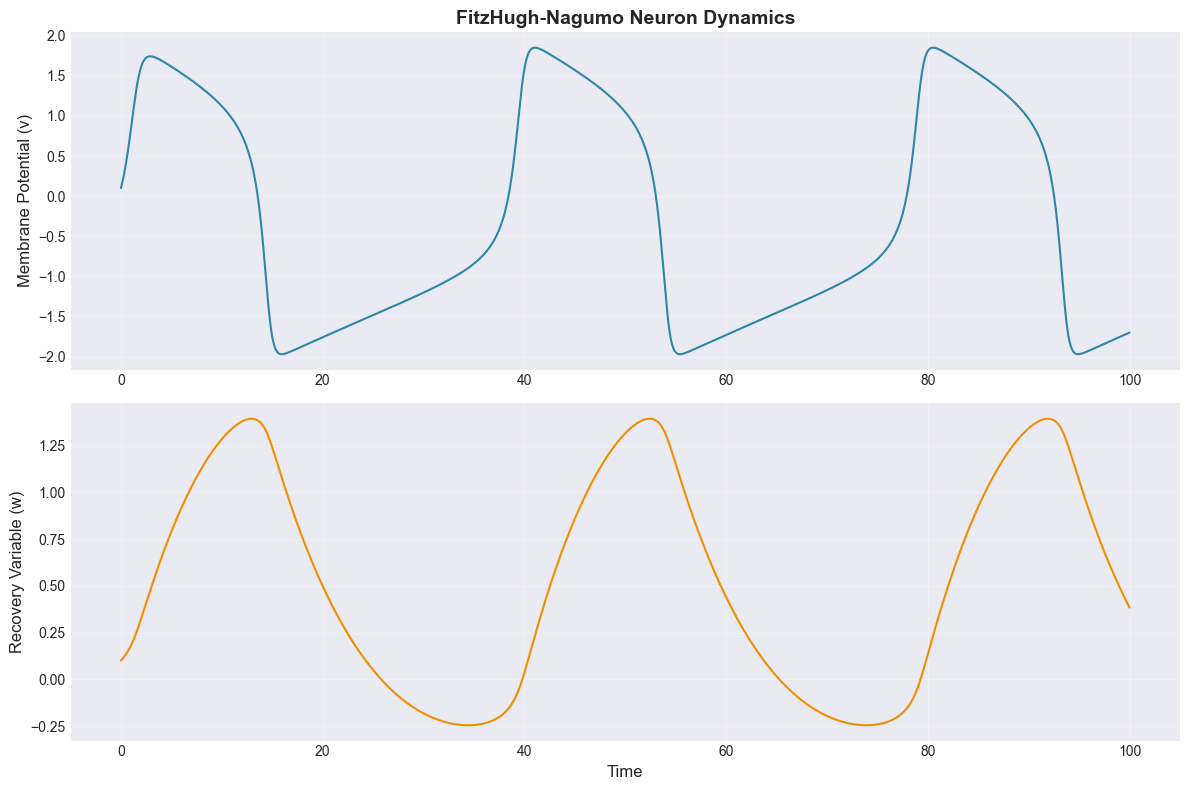

✓ The neuron exhibits limit cycle oscillations (repetitive spiking)


In [3]:
# Create time series plot
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot membrane potential
axes[0].plot(t, v, color=VIZ_PARAMS['teacher_color'], linewidth=1.5)
axes[0].set_ylabel('Membrane Potential (v)', fontsize=12)
axes[0].set_title('FitzHugh-Nagumo Neuron Dynamics', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot recovery variable
axes[1].plot(t, w, color=VIZ_PARAMS['memristor_color'], linewidth=1.5)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Recovery Variable (w)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ The neuron exhibits limit cycle oscillations (repetitive spiking)")

## Section 3: Phase Plane Analysis

The **phase plane** shows the relationship between $v$ and $w$. 

### Nullclines
- **v-nullcline** (blue): Points where $dv/dt = 0$
- **w-nullcline** (red): Points where $dw/dt = 0$
- **Fixed point**: Intersection of nullclines (equilibrium)
- **Limit cycle**: Closed trajectory in phase space (oscillation)

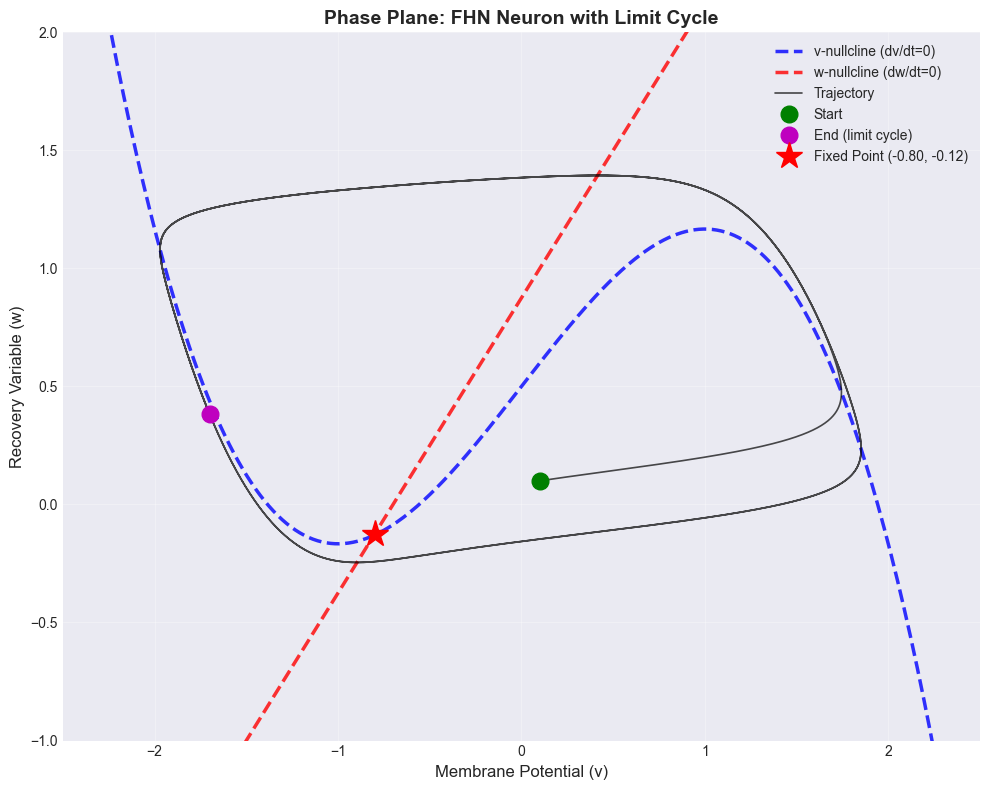

✓ The trajectory spirals outward toward a stable limit cycle
✓ This represents repetitive spiking behavior (oscillator)


In [4]:
# Create phase plane plot
v_range = np.linspace(-3, 3, 500)
w_v_null, w_w_null = fhn_nullclines(v_range, a, b, I_ext)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot nullclines
ax.plot(v_range, w_v_null, 'b--', linewidth=2.5, label='v-nullcline (dv/dt=0)', alpha=0.8)
ax.plot(v_range, w_w_null, 'r--', linewidth=2.5, label='w-nullcline (dw/dt=0)', alpha=0.8)

# Plot trajectory
ax.plot(v, w, 'k-', linewidth=1.2, alpha=0.7, label='Trajectory')
ax.plot(v[0], w[0], 'go', markersize=12, label='Start', zorder=5)
ax.plot(v[-1], w[-1], 'mo', markersize=12, label='End (limit cycle)', zorder=5)

# Find and plot fixed point (approximate)
# Fixed point is where both nullclines intersect
idx_intersect = np.argmin(np.abs(w_v_null - w_w_null))
v_fp = v_range[idx_intersect]
w_fp = w_w_null[idx_intersect]
ax.plot(v_fp, w_fp, 'r*', markersize=20, label=f'Fixed Point ({v_fp:.2f}, {w_fp:.2f})', zorder=5)

ax.set_xlabel('Membrane Potential (v)', fontsize=12)
ax.set_ylabel('Recovery Variable (w)', fontsize=12)
ax.set_title('Phase Plane: FHN Neuron with Limit Cycle', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-1, 2)

plt.tight_layout()
plt.show()

print("✓ The trajectory spirals outward toward a stable limit cycle")
print("✓ This represents repetitive spiking behavior (oscillator)")

## Section 4: Excitability vs Oscillatory Regimes

The FHN model can exhibit two distinct behaviors:
1. **Excitable**: Returns to rest after perturbation (small $I_{ext}$)
2. **Oscillatory**: Sustained oscillations (larger $I_{ext}$)

Let's explore this by varying the external current.

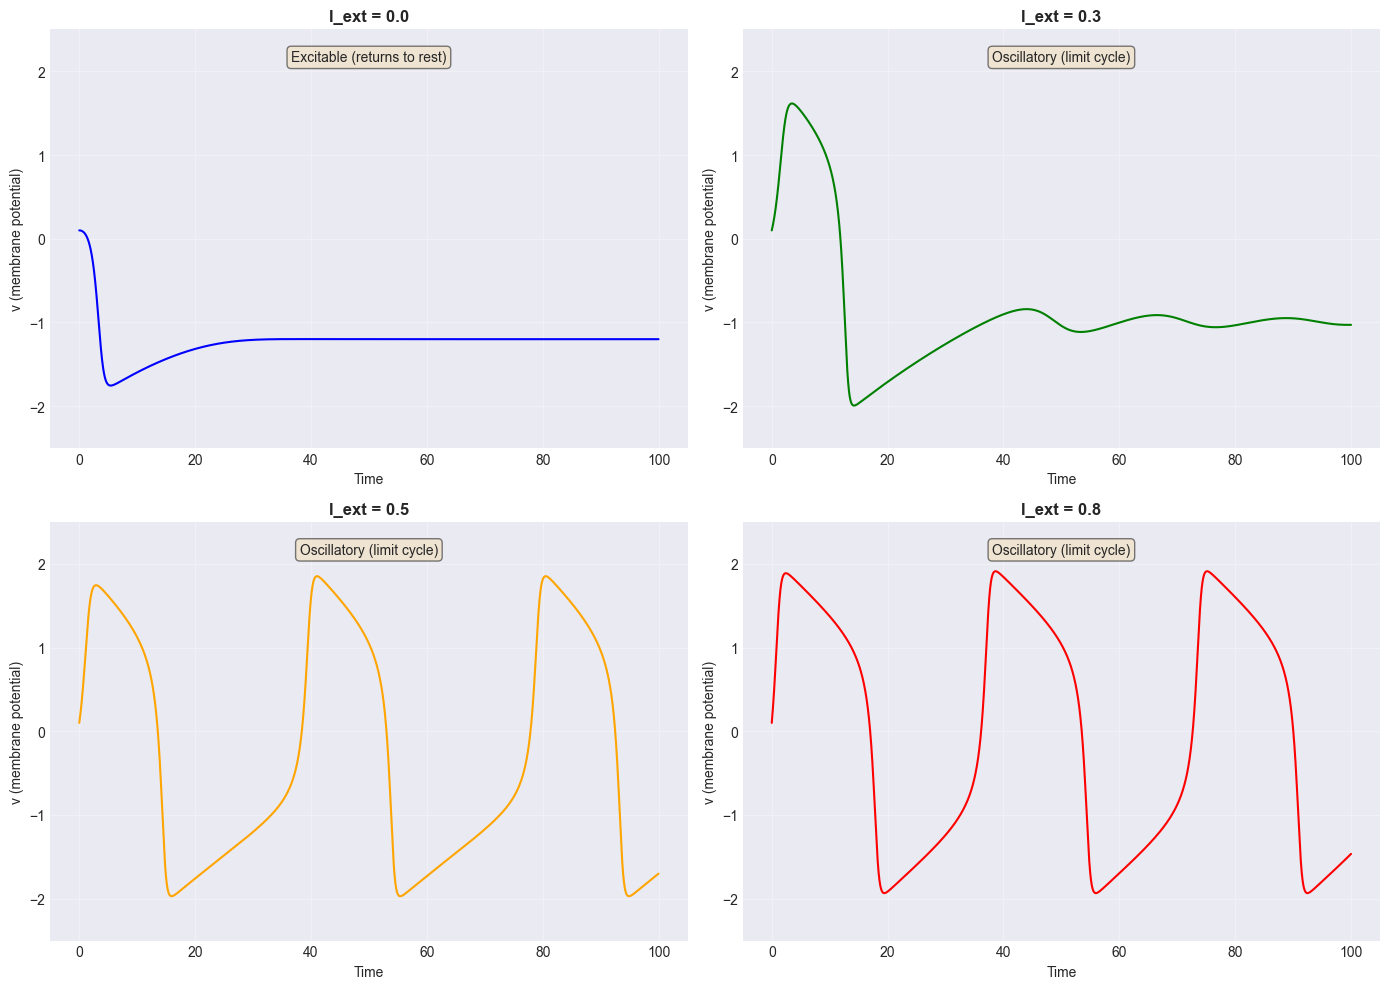


KEY OBSERVATIONS:
• Small I_ext (0.0): Neuron is excitable, returns to rest
• Intermediate I_ext (0.3): Transition region
• Large I_ext (0.5, 0.8): Sustained oscillations (limit cycle)


In [5]:
# Test different external currents
I_values = [0.0, 0.3, 0.5, 0.8]
colors = ['blue', 'green', 'orange', 'red']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, I_test in enumerate(I_values):
    # Simulate with different I_ext
    sol = odeint(fitzhugh_nagumo_ode, initial_state, t, args=(a, b, tau, I_test))
    v_test = sol[:, 0]
    w_test = sol[:, 1]
    
    # Plot time series
    axes[idx].plot(t, v_test, color=colors[idx], linewidth=1.5)
    axes[idx].set_title(f'I_ext = {I_test}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Time', fontsize=10)
    axes[idx].set_ylabel('v (membrane potential)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(-2.5, 2.5)
    
    # Identify behavior type
    if np.std(v_test[-1000:]) < 0.01:  # Check if settled to fixed point
        behavior = "Excitable (returns to rest)"
    else:
        behavior = "Oscillatory (limit cycle)"
    axes[idx].text(0.5, 0.95, behavior, transform=axes[idx].transAxes,
                   ha='center', va='top', fontsize=10, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY OBSERVATIONS:")
print("="*60)
print("• Small I_ext (0.0): Neuron is excitable, returns to rest")
print("• Intermediate I_ext (0.3): Transition region")
print("• Large I_ext (0.5, 0.8): Sustained oscillations (limit cycle)")
print("="*60)

## Section 5: Response to Brief Stimulus (Excitability)

Let's demonstrate **excitability**: a brief strong pulse can trigger a spike even when the neuron is at rest.

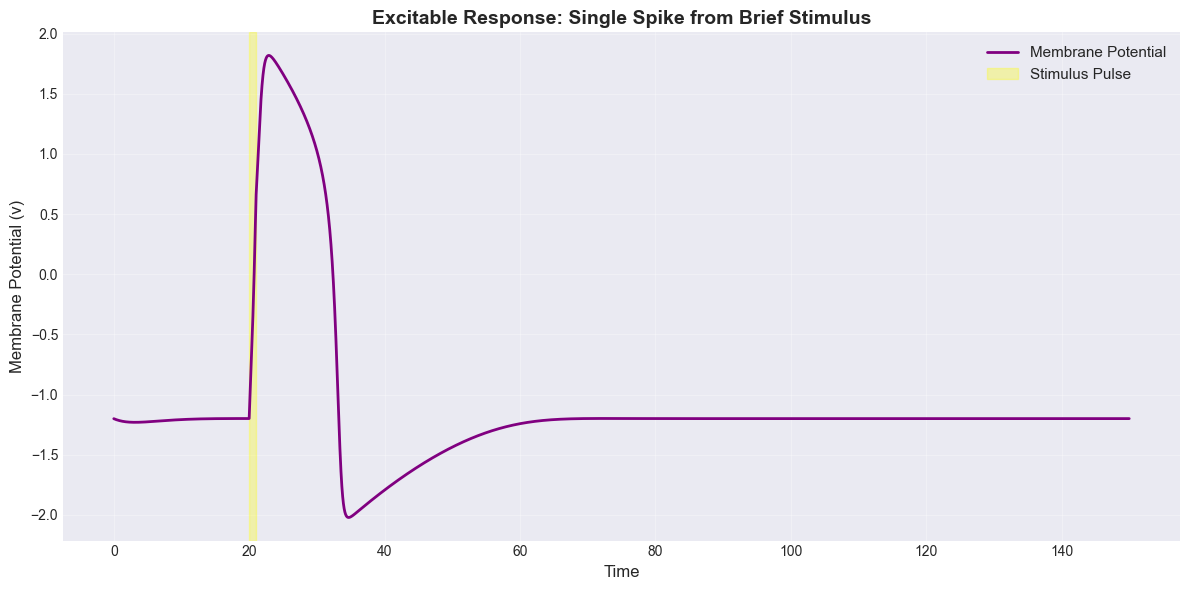

✓ A brief strong pulse triggers an action potential (spike)
✓ After the spike, the neuron returns to rest
✓ This is the hallmark of an EXCITABLE system


In [6]:
# Create a time-varying external current (pulse)
def fhn_with_pulse(state, t, a, b, tau, pulse_time, pulse_duration, pulse_strength):
    """
    FHN with a brief pulse stimulus
    """
    v, w = state
    
    # Pulse current
    if pulse_time <= t <= pulse_time + pulse_duration:
        I_ext = pulse_strength
    else:
        I_ext = 0.0  # No baseline current
    
    dv_dt = v - (v**3)/3 - w + I_ext
    dw_dt = (v + a - b*w) / tau
    return [dv_dt, dw_dt]

# Simulation
t_pulse = np.arange(0, 150, dt)
pulse_time = 20
pulse_duration = 1
pulse_strength = 1.5

# Start at rest (near fixed point)
initial_rest = [-1.2, -0.6]

sol_pulse = odeint(fhn_with_pulse, initial_rest, t_pulse, 
                   args=(a, b, tau, pulse_time, pulse_duration, pulse_strength))
v_pulse = sol_pulse[:, 0]
w_pulse = sol_pulse[:, 1]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t_pulse, v_pulse, color='purple', linewidth=2, label='Membrane Potential')
ax.axvspan(pulse_time, pulse_time + pulse_duration, alpha=0.3, color='yellow', label='Stimulus Pulse')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Membrane Potential (v)', fontsize=12)
ax.set_title('Excitable Response: Single Spike from Brief Stimulus', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ A brief strong pulse triggers an action potential (spike)")
print("✓ After the spike, the neuron returns to rest")
print("✓ This is the hallmark of an EXCITABLE system")

## Summary and Key Takeaways

### What We Learned:
1. ✅ **Implemented the FitzHugh-Nagumo model** using numerical integration
2. ✅ **Visualized dynamics** in both time domain and phase space
3. ✅ **Identified two regimes**:
   - **Excitable**: Returns to rest after perturbation
   - **Oscillatory**: Sustained limit cycle oscillations
4. ✅ **Phase plane analysis**: Nullclines, fixed points, and limit cycles

### Biological Relevance:
- The FHN model captures the **essential dynamics of neuronal excitability**
- It's computationally efficient while preserving key features of Hodgkin-Huxley
- Forms the foundation for studying **network dynamics and synaptic plasticity**

### Next Steps:
In **Notebook 2**, we'll couple two FHN neurons and explore **synchronization** with static coupling.